In [253]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [254]:
UNSAM_LC = "IQM_UNSAM_LC.csv"
JUK = "IQM_JUK.csv"
RRIB = "IQM_RRIB.csv"
ADNI="IQM_ADNI.csv"

# boxplot de cnr y efc para cada dataset
iqm_unsam = pd.read_csv(UNSAM_LC)
iqm_juk = pd.read_csv(JUK)
iqm_rrib = pd.read_csv(RRIB)
iqm_adni = pd.read_csv(ADNI)

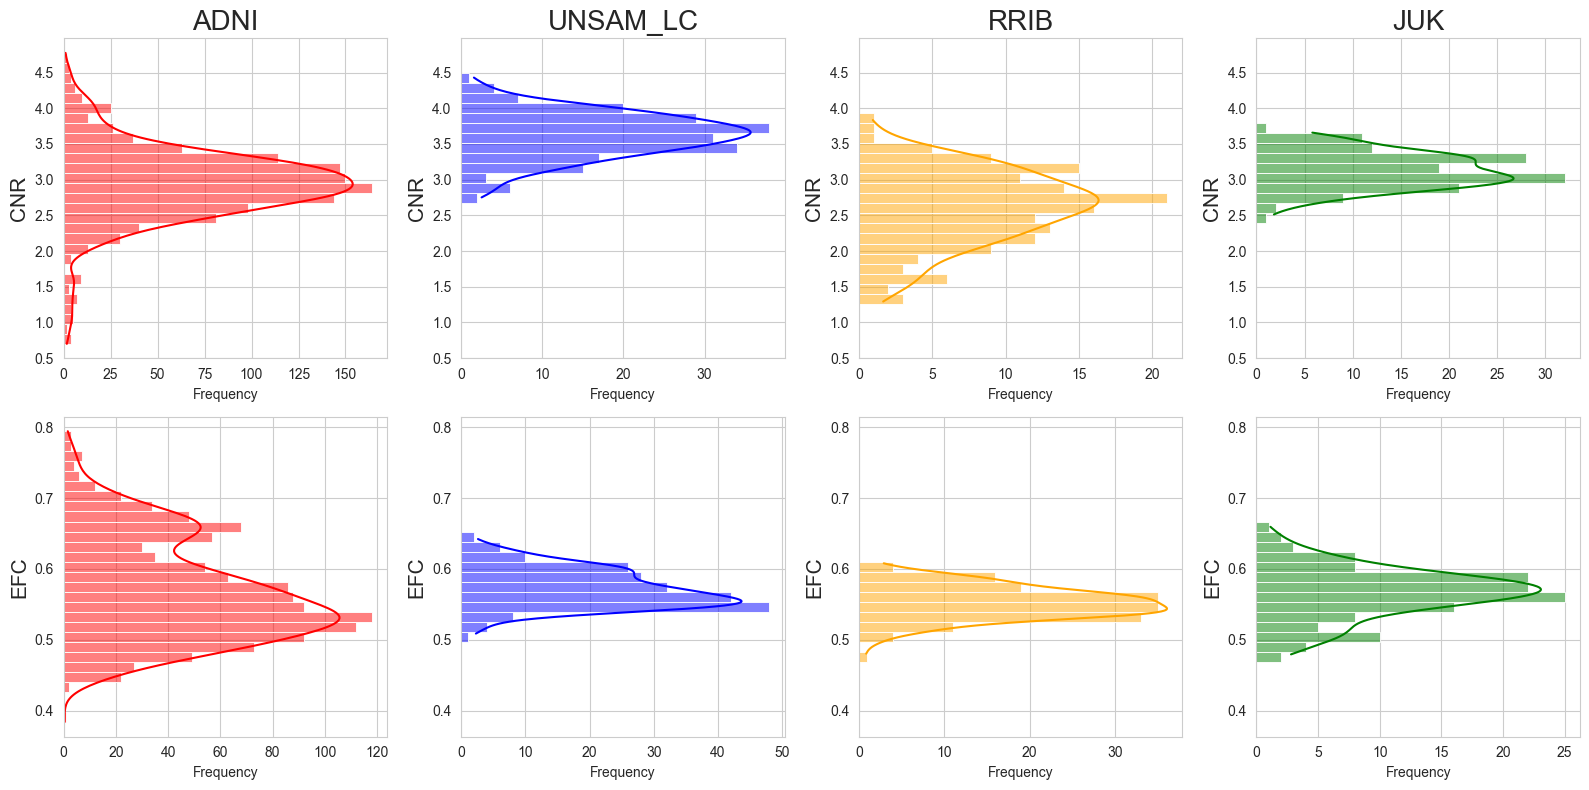

In [255]:
import numpy as np

# Unir todos los valores de cnr y efc para calcular bins comunes
all_cnr = np.concatenate([
    iqm_adni['cnr'],
    iqm_unsam['cnr'],
    iqm_rrib['cnr'],
    iqm_juk['cnr']
])

all_efc = np.concatenate([
    iqm_adni['efc'],
    iqm_unsam['efc'],
    iqm_rrib['efc'],
    iqm_juk['efc']
])

# Definir número de bins (podés cambiarlo)
num_bins = 30

# Crear bins iguales para todos
cnr_bins = np.linspace(all_cnr.min(), all_cnr.max(), num_bins)
efc_bins = np.linspace(all_efc.min(), all_efc.max(), num_bins)

# =========================
#     PLOT CON BINS IGUALES
# =========================

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# --- ADNI ---
sns.histplot(data=iqm_adni, y='cnr', ax=axes[0, 0], kde=True, bins=cnr_bins, color='red')
axes[0, 0].set_title('ADNI', fontsize=20)
sns.histplot(data=iqm_adni, y='efc', ax=axes[1, 0], kde=True, bins=efc_bins, color='red')
axes[0, 0].set_xlabel('Frequency')             # antes era set_ylabel
axes[1, 0].set_xlabel('Frequency')             # antes era set_ylabel
axes[1, 0].set_ylabel('EFC', fontsize=15)      # antes era set_xlabel
axes[0, 0].set_ylabel('CNR', fontsize=15)      # antes era set_xlabel

# --- UNSAM ---
sns.histplot(data=iqm_unsam, y='cnr', ax=axes[0, 1], kde=True, bins=cnr_bins, color='blue')
axes[0, 1].set_title('UNSAM_LC', fontsize=20)
sns.histplot(data=iqm_unsam, y='efc', ax=axes[1, 1], kde=True, bins=efc_bins, color='blue')
axes[0, 1].set_xlabel('Frequency')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('EFC', fontsize=15)
axes[0, 1].set_ylabel('CNR', fontsize=15)

# --- RRIB ---
sns.histplot(data=iqm_rrib, y='cnr', ax=axes[0, 2], kde=True, bins=cnr_bins, color='orange')
axes[0, 2].set_title('RRIB', fontsize=20)
sns.histplot(data=iqm_rrib, y='efc', ax=axes[1, 2], kde=True, bins=efc_bins, color='orange')
axes[0, 2].set_xlabel('Frequency')
axes[1, 2].set_xlabel('Frequency')
axes[1, 2].set_ylabel('EFC', fontsize=15)
axes[0, 2].set_ylabel('CNR', fontsize=15)

# --- JUK ---
sns.histplot(data=iqm_juk, y='cnr', ax=axes[0, 3], kde=True, bins=cnr_bins, color='green')
axes[0, 3].set_title('JUK', fontsize=20)
sns.histplot(data=iqm_juk, y='efc', ax=axes[1, 3], kde=True, bins=efc_bins, color='green')
axes[0, 3].set_xlabel('Frequency')
axes[1, 3].set_xlabel('Frequency')
axes[1, 3].set_ylabel('EFC', fontsize=15)
axes[0, 3].set_ylabel('CNR', fontsize=15)

plt.tight_layout()
plt.show()

## influence of CNR and EFC of Absolute_Error and BAG

In [256]:
repo_path= '/Users/parri/OneDrive/Documentos/Beca PEFI/brainage-models-benchmark'
BAN_UNSAM=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_UNSAM.csv')
BAN_ADNI=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_ADNI.csv')
BAN_RRIB=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_RRIB.csv')
BAN_JUK=pd.read_csv(repo_path+'/results/BrainAgeNeXt/BAN_JUK.csv')

DBN_UNSAM=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_UNSAM_BET.csv')
DBN_ADNI=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_ADNI_BET.csv')
DBN_RRIB=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_RRIB_BET.csv')
DBN_JUK=pd.read_csv(repo_path+'/results/DeepBrainNet/DBN_JUK_BET.csv')

pyment_UNSAM=pd.read_csv(repo_path+'/results/pyment/pyment_UNSAM.csv')
pyment_ADNI=pd.read_csv(repo_path+'/results/pyment/pyment_ADNI.csv')
pyment_RRIB=pd.read_csv(repo_path+'/results/pyment/pyment_RRIB.csv')
pyment_JUK=pd.read_csv(repo_path+'/results/pyment/pyment_JUK.csv')

ENIGMA_UNSAM=pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_UNSAM.csv')
ENIGMA_ADNI=pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_ADNI.csv')
ENIGMA_JUK= pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_JUK.csv')
ENIGMA_RRIB=pd.read_csv(repo_path+'/results/ENIGMA/ENIGMA_RRIB.csv')

ENIGMA_ADNI=ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN'] 
pyment_ADNI=pyment_ADNI[pyment_ADNI['Group']=='CN']
DBN_ADNI=DBN_ADNI[DBN_ADNI['Group']=='CN']
BAN_ADNI=BAN_ADNI[BAN_ADNI['Group']=='CN']

ENIGMA_UNSAM=ENIGMA_UNSAM[ENIGMA_UNSAM['Grupo']=='CONTROL']
pyment_UNSAM=pyment_UNSAM[pyment_UNSAM['Grupo']=='CONTROL']
DBN_UNSAM=DBN_UNSAM[DBN_UNSAM['Grupo']=='CONTROL']
BAN_UNSAM=BAN_UNSAM[BAN_UNSAM['Grupo']=='CONTROL']

In [257]:
iqm_adni.rename(columns={'subject':'ID'},inplace=True)
iqm_adni["ID"]=iqm_adni['ID'].str.replace("sub-", "", regex=False)
import re
def convertir(id_str):
    return re.sub(r"^(\d{3})([A-Z])(\d{4})([A-Z])(\d+)$", r"\1_\2_\3_\4\5", id_str)

iqm_adni["ID"] = iqm_adni["ID"].apply(convertir)

iqm_unsam.rename(columns={'subject':'ID'},inplace=True)
iqm_unsam["ID"]=iqm_unsam['ID'].str.replace("sub-", "", regex=False)

iqm_rrib.rename(columns={'subject':'ID'},inplace=True)

iqm_juk.rename(columns={'subject':'ID'},inplace=True)

ENIGMA_JUK.rename(columns={'participant_id':'ID'},inplace=True)
ENIGMA_RRIB.rename(columns={'participant_id':'ID'},inplace=True)

In [258]:
BAN_ADNI=pd.merge(BAN_ADNI,iqm_adni,on='ID', how='inner')
BAN_UNSAM=pd.merge(BAN_UNSAM,iqm_unsam,on='ID', how='inner')
BAN_RRIB=pd.merge(BAN_RRIB,iqm_rrib,on='ID', how='inner')
BAN_JUK=pd.merge(BAN_JUK,iqm_juk,on='ID', how='inner')

DBN_ADNI=pd.merge(DBN_ADNI,iqm_adni,on='ID', how='inner')
DBN_UNSAM=pd.merge(DBN_UNSAM,iqm_unsam,on='ID', how='inner')
DBN_RRIB=pd.merge(DBN_RRIB,iqm_rrib,on='ID', how='inner')
DBN_JUK=pd.merge(DBN_JUK,iqm_juk,on='ID', how='inner')

pyment_ADNI=pd.merge(pyment_ADNI,iqm_adni,on='ID', how='inner')
pyment_UNSAM=pd.merge(pyment_UNSAM,iqm_unsam,on='ID', how='inner')
pyment_RRIB=pd.merge(pyment_RRIB,iqm_rrib,on='ID', how='inner')
pyment_JUK=pd.merge(pyment_JUK,iqm_juk,on='ID', how='inner')

ENIGMA_ADNI=pd.merge(ENIGMA_ADNI,iqm_adni,on='ID', how='inner')
ENIGMA_UNSAM=pd.merge(ENIGMA_UNSAM,iqm_unsam,on='ID', how='inner')
ENIGMA_RRIB=pd.merge(ENIGMA_RRIB,iqm_rrib,on='ID', how='inner')
ENIGMA_JUK=pd.merge(ENIGMA_JUK,iqm_juk,on='ID', how='inner')

In [259]:
DBN_UNSAM.rename(columns={'Edad': 'Age'}, inplace=True)
DBN_UNSAM=DBN_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

DBN_ADNI.rename(columns={'Absolute_error': 'Absolute_Error'}, inplace=True)
DBN_ADNI=DBN_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

DBN_JUK.rename(columns={'age':'Age'}, inplace=True)
DBN_JUK.rename(columns={'Absolute_error': 'Absolute_Error'}, inplace=True)
DBN_JUK=DBN_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]
DBN_JUK['ID']='JUK_' + DBN_JUK['ID']

DBN_RRIB.rename(columns={'Absolute_error': 'Absolute_Error','age':'Age'}, inplace=True)
DBN_RRIB=DBN_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_DBN = pd.concat([DBN_UNSAM, DBN_ADNI, DBN_JUK, DBN_RRIB], ignore_index=True)

In [260]:
ENIGMA_UNSAM.rename(columns={'Absolute Error': 'Absolute_Error', 'Edad':'Age'}, inplace=True)
ENIGMA_UNSAM=ENIGMA_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

ENIGMA_ADNI.rename(columns={'Absolute Error': 'Absolute_Error'}, inplace=True)
ENIGMA_ADNI=ENIGMA_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

ENIGMA_JUK.rename(columns={'age':'Age','Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_JUK=ENIGMA_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]
ENIGMA_JUK['ID']='JUK_' + ENIGMA_JUK['ID']

ENIGMA_RRIB.rename(columns={'age':'Age','Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_RRIB=ENIGMA_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_ENIGMA = pd.concat([ENIGMA_UNSAM, ENIGMA_ADNI, ENIGMA_JUK, ENIGMA_RRIB], ignore_index=True)

In [261]:
pyment_UNSAM.rename(columns={'Edad':'Age'},inplace=True)
pyment_UNSAM=pyment_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

pyment_ADNI=pyment_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

pyment_JUK.rename(columns={'age':'Age'}, inplace=True)
pyment_JUK=pyment_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]
pyment_JUK['ID']='JUK_' + pyment_JUK['ID']

pyment_RRIB.rename(columns={'age':'Age'}, inplace=True)
pyment_RRIB=pyment_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_pyment = pd.concat([pyment_UNSAM, pyment_ADNI, pyment_JUK, pyment_RRIB], ignore_index=True)

In [262]:
BAN_UNSAM.rename(columns={'Edad':'Age'}, inplace=True)
BAN_UNSAM=BAN_UNSAM[['ID','Absolute_Error','Error','Age','cnr','efc']]

BAN_ADNI=BAN_ADNI[['ID','Absolute_Error','Error','Age','cnr','efc']]

BAN_RRIB.rename(columns={'age':'Age'}, inplace=True)
BAN_RRIB=BAN_RRIB[['ID','Absolute_Error','Error','Age','cnr','efc']]
BAN_RRIB['ID']='RRIB_' + BAN_RRIB['ID']

BAN_JUK.rename(columns={'age':'Age'}, inplace=True)
BAN_JUK=BAN_JUK[['ID','Absolute_Error','Error','Age','cnr','efc']]

concat_BAN = pd.concat([BAN_UNSAM, BAN_ADNI, BAN_JUK, BAN_RRIB], ignore_index=True)

In [263]:
BAN_CA_mean=np.mean(concat_BAN['Age'])
DBN_CA_mean=np.mean(concat_DBN['Age'])
pyment_CA_mean=np.mean(concat_pyment['Age'])
ENIGMA_CA_mean=np.mean(concat_ENIGMA['Age'])

concat_BAN['Corrected_age']=concat_BAN['Age']-BAN_CA_mean
concat_DBN['Corrected_age']=concat_DBN['Age']-DBN_CA_mean
concat_pyment['Corrected_age']=concat_pyment['Age']-pyment_CA_mean
concat_ENIGMA['Corrected_age']=concat_ENIGMA['Age']-ENIGMA_CA_mean

In [264]:
import statsmodels.formula.api as smf

In [267]:
# Si tu dataframe se llama BAN_all:
model = smf.ols("Absolute_Error ~ Corrected_age * cnr", data=concat_ENIGMA).fit()

model_reduced = smf.ols("Absolute_Error ~ Corrected_age ", data=concat_ENIGMA).fit()

print(model.summary())

# R² total 
r2_full = model.rsquared 

# Modelo reducido sin dataset (solo mean) 
r2_reduced = model_reduced.rsquared 

# f² para dataset 
f2_dataset = (r2_full - r2_reduced) / (1 - r2_full)
#0.02= small, 0.15=medium, 0.35=large 
print("f² (Dataset):", f2_dataset)

                            OLS Regression Results                            
Dep. Variable:         Absolute_Error   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.12
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           5.39e-09
Time:                        18:32:28   Log-Likelihood:                -3107.7
No. Observations:                 885   AIC:                             6223.
Df Residuals:                     881   BIC:                             6242.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.0714      1.80

In [280]:
from scipy.stats import spearmanr

rho_cnr, p_cnr = spearmanr(concat_BAN['cnr'], concat_BAN['Absolute_Error'])
rho_efc, p_efc = spearmanr(concat_BAN['efc'], concat_BAN['Absolute_Error'])

print(f'CNR: ',rho_cnr, p_cnr)
print(f'EFC: ',rho_efc, p_efc)

CNR:  -0.015977664400135632 0.6302650954503156
EFC:  -0.0012757910813578073 0.9693425347103832


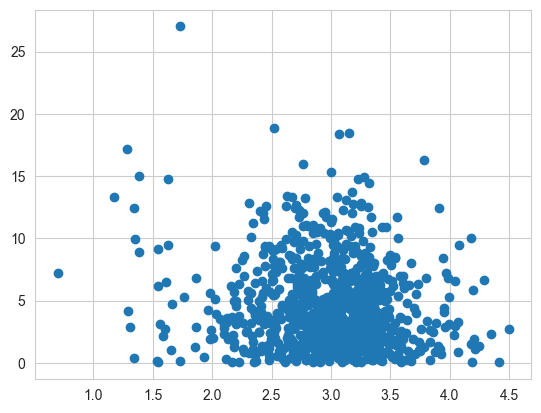

In [273]:
plt.scatter(x=concat_pyment['cnr'],y=concat_pyment['Absolute_Error'])

plt.scatter(x=concat_pyment)